# **Tugas 1 Praktikum Machine Learning**

# Deskripsi Dataset
Dataset ini berisi indeks Kualitas Hidup untuk berbagai negara di dunia, diambil dari situs Numbeo. Data ini mencakup kolom seperti Peringkat, Nama Negara, Indeks Kualitas Hidup, Daya Beli, Indeks Keamanan, Indeks Kesehatan, Biaya Hidup, dan lainnya. Indeks Kualitas Hidup menggabungkan berbagai indikator, sehingga berguna untuk perbandingan antar negara. Data dikumpulkan melalui web scraping menggunakan Python, dengan pustaka seperti `requests` dan `BeautifulSoup`. Dataset ini dapat digunakan untuk pengambilan keputusan relokasi, analisis global, visualisasi data, dan model prediktif. Dataset dapat diakses melalui link berikut: https://www.kaggle.com/datasets/marcelobatalhah/quality-of-life-index-by-country


# Data Loading
Mengimpor berbagai pustaka penting, seperti pandas dan numpy untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta scikit-learn untuk preprocessing dan pemodelan. Model yang digunakan dalam analisis meliputi Linear Regression, Random Forest Regressor, dan Gradient Boosting Regressor.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Memuat dataset yang diambil langsung dari URL dalam format CSV dari repositori GitHub.

In [75]:
# URL dataset
url = "https://raw.githubusercontent.com/dellara22/Machine-Learning/refs/heads/main/Praktikum/quality_of_life_indices_by_country.csv"

# Membaca dataset langsung dari URL
df = pd.read_csv(url)

# Data Understanding
Memahami dataset dengan melihat jumlah baris dan kolom, menampilkan beberapa sampel data, menampilkan informasi terkait dataset termasuk tipe datanya, melihat statistik deskriptifnya dengan lengkap, mengecek missing value, outlier, dan data duplikat.

In [76]:
# Melihat jumlah baris dan kolom
df.shape

(1495, 12)

In [77]:
# Menampilkan beberapa sampel data
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


In [78]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

In [79]:
# Statistik deskriptif
print(df.describe(include="all"))

               Rank      Country  Quality of Life Index  \
count   1495.000000         1495            1495.000000   
unique          NaN           98                    NaN   
top             NaN  Switzerland                    NaN   
freq            NaN           20                    NaN   
mean      38.733779          NaN             134.156656   
std       22.931071          NaN              40.828402   
min        1.000000          NaN             -53.000000   
25%       19.000000          NaN             105.350000   
50%       38.000000          NaN             136.200000   
75%       57.000000          NaN             165.700000   
max       87.000000          NaN             285.800000   

        Purchasing Power Index  Safety Index  Health Care Index  \
count              1495.000000   1495.000000        1495.000000   
unique                     NaN           NaN                NaN   
top                        NaN           NaN                NaN   
freq                   

In [80]:
# Mengecek missing values
print(df.isnull().sum())

Rank                              0
Country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Cost of Living Index              0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
Year                              0
dtype: int64


In [81]:
# Menentukan batas outlier hanya untuk kolom numerik
numerical_columns = df.select_dtypes(include=['number'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier di setiap fitur numerik
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).sum()
print("Jumlah outlier pada setiap fitur numerik:")
print(outliers)

Jumlah outlier pada setiap fitur numerik:
Rank                                0
Quality of Life Index              15
Purchasing Power Index              4
Safety Index                       29
Health Care Index                   1
Cost of Living Index               16
Property Price to Income Ratio    101
Traffic Commute Time Index         43
Pollution Index                     0
dtype: int64


In [82]:
# Mengecek jumlah duplikasi
print(df.duplicated().sum())

0


# Data Preparation
Melakukan pembersihan pada dataset, menyesuaikan kembali tipe data, dan menghapus baris indeks kualitas hidup yang memiliki nilai negatif.

In [83]:
# Mengonversi Climate Index ke numerik (mengganti '-' dengan NaN)
df["Climate Index"] = pd.to_numeric(df["Climate Index"], errors="coerce")

In [84]:
# Mengonversi Year ke tipe numerik
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

In [85]:
# Menghapus baris dengan Quality of Life Index negatif
df = df[df["Quality of Life Index"] >= 0]

## **Melihat kembali dataset setelah dilakukan pembersihan**

In [86]:
# Melihat jumlah baris dan kolom
df.shape

(1488, 12)

In [87]:
# Statistik deskriptif
print(df.describe(include="all"))

               Rank      Country  Quality of Life Index  \
count   1488.000000         1488            1488.000000   
unique          NaN           96                    NaN   
top             NaN  Switzerland                    NaN   
freq            NaN           20                    NaN   
mean      38.540995          NaN             134.899194   
std       22.802410          NaN              39.438936   
min        1.000000          NaN               0.000000   
25%       19.000000          NaN             105.750000   
50%       38.000000          NaN             136.650000   
75%       56.000000          NaN             165.750000   
max       87.000000          NaN             285.800000   

        Purchasing Power Index  Safety Index  Health Care Index  \
count              1488.000000   1488.000000        1488.000000   
unique                     NaN           NaN                NaN   
top                        NaN           NaN                NaN   
freq                   

In [88]:
# Mencari negara dengan Property Price to Income Ratio = 26.400000
result = df[df['Property Price to Income Ratio'] == 202.100000]

# Menampilkan hasil
print(result[['Country', 'Property Price to Income Ratio']])

       Country  Property Price to Income Ratio
326  Venezuela                           202.1


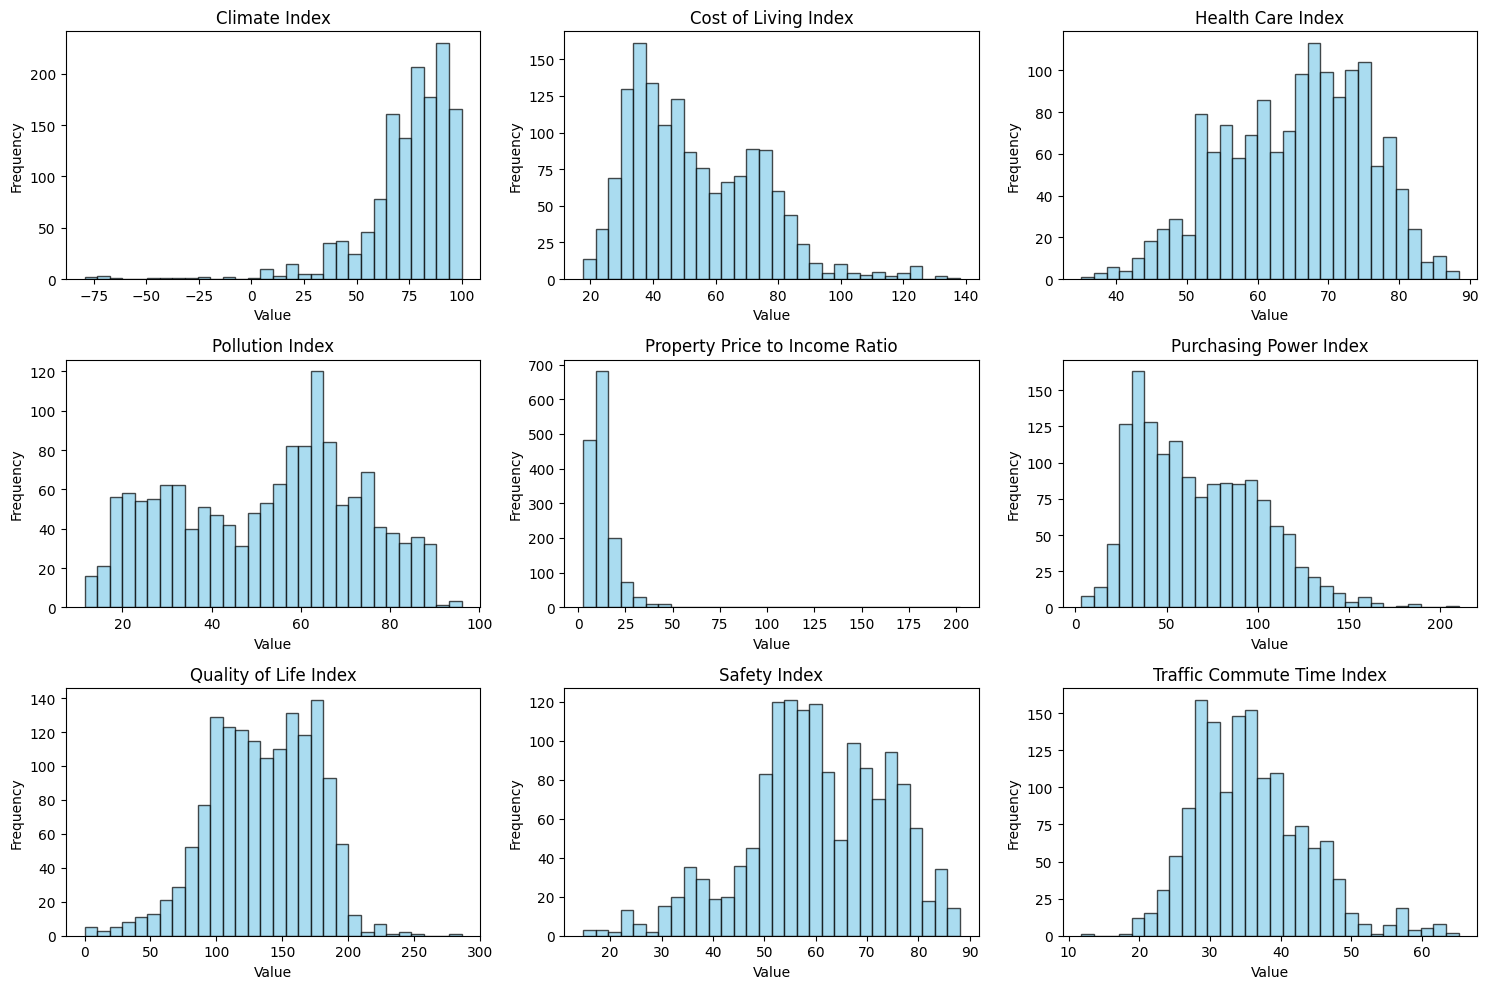

In [89]:
# Pilih kolom numerik (kecuali Rank dan Year)
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns.difference(["Rank", "Year"])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, color="skyblue", edgecolor="black")
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Gambar di atas merupakan kumpulan histogram yang menunjukkan distribusi berbagai indeks yang mempengaruhi kualitas hidup. Setiap histogram menggambarkan bagaimana nilai-nilai dalam dataset tersebar, dengan sumbu horizontal menunjukkan nilai indeks dan sumbu vertikal menunjukkan frekuensi kemunculannya.  

Beberapa indeks seperti **Climate Index** dan **Quality of Life Index** menunjukkan distribusi yang cenderung normal dengan puncak di tengah, menandakan sebagian besar wilayah memiliki nilai indeks yang seimbang. **Cost of Living Index** dan **Health Care Index** memiliki distribusi yang lebih bervariasi tanpa pola simetris yang jelas. **Pollution Index** juga menunjukkan variasi yang cukup luas, dengan banyak daerah memiliki tingkat polusi menengah hingga tinggi.  

Sementara itu, **Property Price to Income Ratio** memiliki distribusi yang sangat miring ke kanan (right-skewed), menandakan bahwa sebagian besar wilayah memiliki rasio rendah, tetapi ada beberapa yang memiliki rasio sangat tinggi. **Purchasing Power Index** menunjukkan distribusi yang cukup menyebar, sedangkan **Safety Index** memiliki puncak di kisaran menengah. **Traffic Commute Time Index** menunjukkan distribusi yang relatif merata, mencerminkan variasi waktu perjalanan yang cukup besar antar wilayah. Visualisasi ini membantu memahami pola dalam data sebelum melakukan analisis lebih lanjut.

## **Outlier**
Melihat kembali data yang memiliki nilai outlier dan memvisualisasikan dengan boxplot.

In [90]:
# Menentukan batas outlier hanya untuk kolom numerik
numerical_columns = df.select_dtypes(include=['number'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier di setiap fitur numerik
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).sum()
print("Jumlah outlier pada setiap fitur numerik:")
print(outliers)

Jumlah outlier pada setiap fitur numerik:
Rank                                0
Quality of Life Index               8
Purchasing Power Index              4
Safety Index                       27
Health Care Index                   0
Cost of Living Index               16
Property Price to Income Ratio    106
Traffic Commute Time Index         41
Pollution Index                     0
Climate Index                      53
Year                                0
dtype: int64


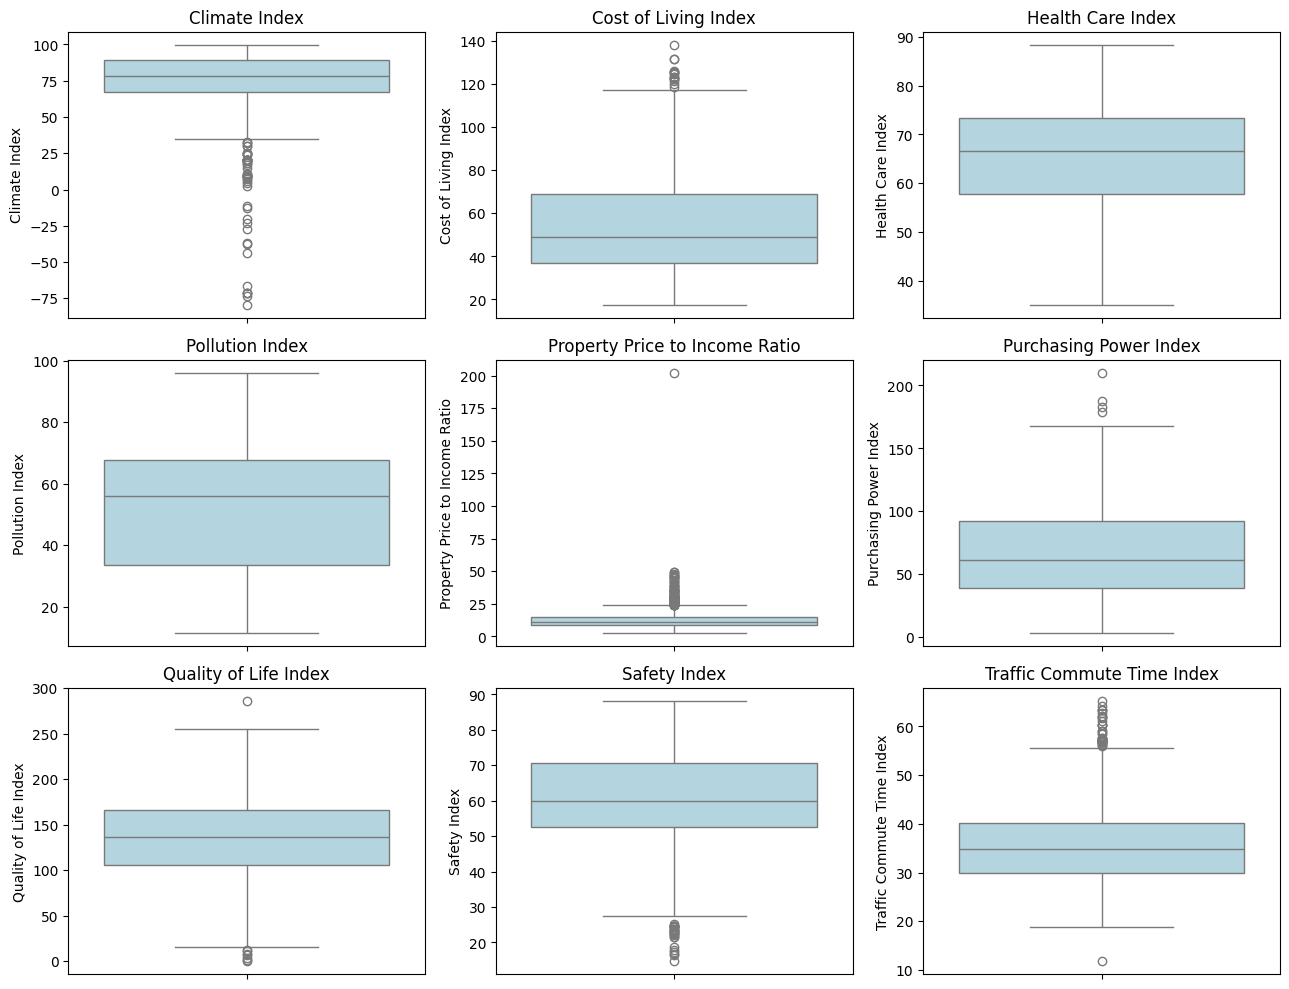

In [91]:
# Plot boxplot untuk melihat outlier pada fitur numerik
plt.figure(figsize=(13, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)

plt.tight_layout()
plt.show()

Menangani outlier dengan winsorize, mengubah nilai outlier menjadi batas persentil tertentu. Yang digunakan disini yaitu mengganti nilai di bawah persentil 5% dengan nilai di persentil 5%, dan nilai di atas persentil 95% dengan nilai di persentil 95%.

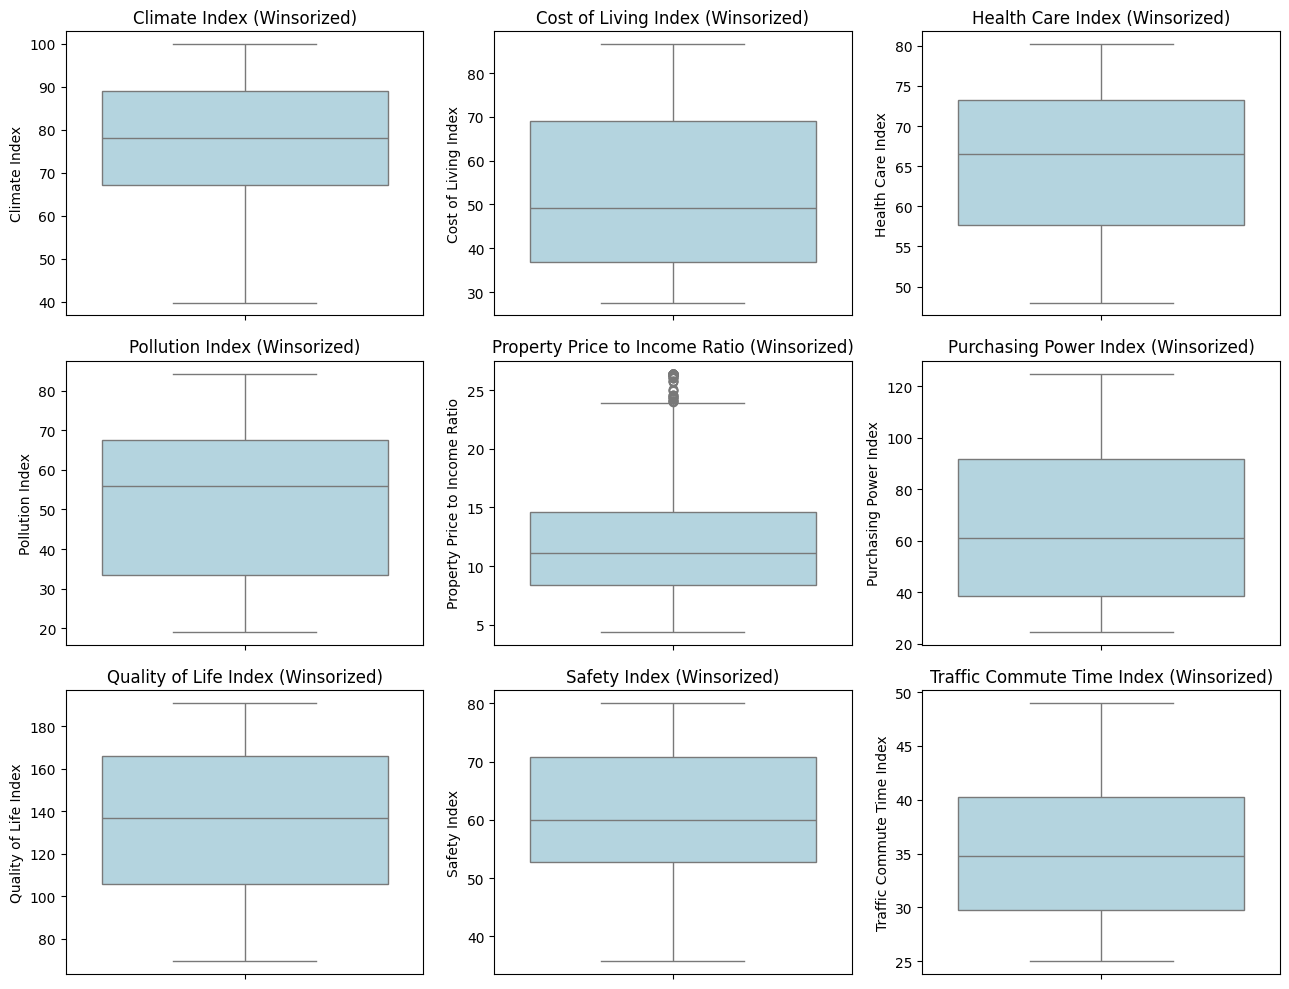

In [92]:
from scipy.stats.mstats import winsorize

# Menerapkan Winsorizing pada fitur numerik (membatasi nilai ekstrem pada persentil 5% dan 95%)
df_winsorized = df.copy()
for col in numeric_columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])  # Membatasi outlier di kedua sisi (5%)

# Plot ulang boxplot setelah Winsorizing untuk melihat perubahan
plt.figure(figsize=(13, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_winsorized[col], color="lightblue")
    plt.title(f"{col} (Winsorized)")

plt.tight_layout()
plt.show()


Melihat kembali data frame setelah dilakukan penanganan outlier dengan winsorize

In [93]:
print(df_winsorized.describe(include="all"))

               Rank      Country  Quality of Life Index  \
count   1488.000000         1488            1488.000000   
unique          NaN           96                    NaN   
top             NaN  Switzerland                    NaN   
freq            NaN           20                    NaN   
mean      38.540995          NaN             135.395228   
std       22.802410          NaN              35.693469   
min        1.000000          NaN              69.400000   
25%       19.000000          NaN             105.750000   
50%       38.000000          NaN             136.650000   
75%       56.000000          NaN             165.750000   
max       87.000000          NaN             190.900000   

        Purchasing Power Index  Safety Index  Health Care Index  \
count              1488.000000   1488.000000        1488.000000   
unique                     NaN           NaN                NaN   
top                        NaN           NaN                NaN   
freq                   

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

Setelah dilakukan winsorize masih ada outlier pada kolom Property Price to Income Ratio, namun sudah lebih baik dan selisihnya tidak terlalu jauh dari sebelumnya.

In [94]:
# Mencari negara dengan Property Price to Income Ratio = 26.400000
result = df_winsorized[df_winsorized['Property Price to Income Ratio'] == 26.400000]

# Menampilkan hasil
print(result[['Country', 'Property Price to Income Ratio']])

                Country  Property Price to Income Ratio
48            Hong Kong                            26.4
75                China                            26.4
126           Hong Kong                            26.4
186           Hong Kong                            26.4
246           Hong Kong                            26.4
...                 ...                             ...
1405            Lebanon                            26.4
1409          Sri Lanka                            26.4
1457  Hong Kong (China)                            26.4
1470              China                            26.4
1492          Sri Lanka                            26.4

[76 rows x 2 columns]


In [95]:
# Mencari negara dengan Property Price to Income Ratio = 26.400000
result = df_winsorized[df_winsorized['Country'] == 'Venezuela']

# Menampilkan hasil
print(result[['Country', 'Property Price to Income Ratio']])

        Country  Property Price to Income Ratio
326   Venezuela                            26.4
1067  Venezuela                            14.4
1154  Venezuela                            18.3
1240  Venezuela                            18.9
1324  Venezuela                            17.1
1408  Venezuela                            15.2


## **Melihat korelasi dengan heatmap**

Melihat korelasi antar fitur dengan heatmap

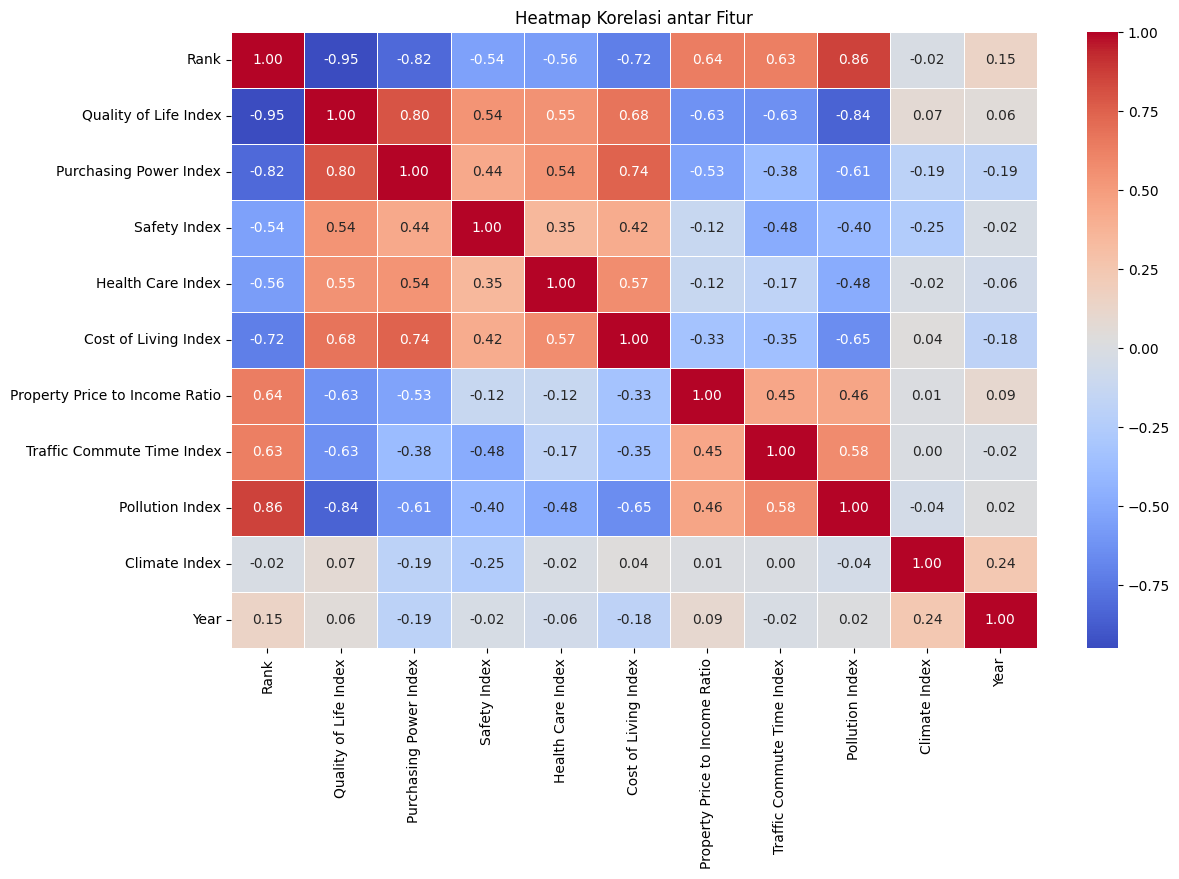

In [96]:
# Menghitung korelasi hanya untuk kolom numerik
correlation_matrix = df_winsorized.select_dtypes(include=['number']).corr()

# Plot heatmap korelasi
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

Heatmap diatas menunjukkan hubungan antar indeks yang mempengaruhi kualitas hidup. Warna merah menandakan korelasi positif, sedangkan biru menunjukkan korelasi negatif. **Quality of Life Index** memiliki hubungan positif dengan **Purchasing Power Index** (0.80) dan **Safety Index** (0.54), yang berarti daya beli tinggi dan lingkungan aman cenderung meningkatkan kualitas hidup. Sebaliknya, kualitas hidup menurun jika **Pollution Index** (-0.84) dan **Traffic Commute Time Index** (-0.63) meningkat. **Purchasing Power Index** juga berkorelasi positif dengan **Safety Index** (0.44) dan negatif dengan **Pollution Index** (-0.60), menunjukkan bahwa daerah dengan daya beli tinggi cenderung lebih aman dan kurang berpolusi. **Cost of Living Index** berhubungan positif dengan **Health Care Index** (0.57) tetapi negatif dengan **Purchasing Power Index** (-0.74), menandakan bahwa daerah dengan biaya hidup tinggi umumnya memiliki layanan kesehatan yang lebih baik, tetapi daya beli masyarakatnya lebih rendah. Selain itu, semakin tinggi **Property Price to Income Ratio**, semakin rendah **Quality of Life Index** (-0.63) dan **Purchasing Power Index** (-0.53), yang menunjukkan bahwa harga properti yang mahal dibandingkan pendapatan cenderung menurunkan kualitas hidup. Heatmap ini membantu memahami faktor-faktor yang memengaruhi kualitas hidup untuk analisis lebih lanjut.

# Membangun Model Regresi
Tahapan ini mempersiapkan data untuk model regresi dengan menghapus **Climate Index** dan **Year** karena ada beberapa value yang berisi NaN serta korelasinya pun rendah. Selanjutnya, fitur (**X**) dan target (**y**) dipisahkan, dengan menghapus kolom non-numerik seperti **Country** dan **Rank**. Data kemudian dibagi menjadi **80% training** dan **20% testing**, lalu distandarisasi menggunakan `StandardScaler` agar model bekerja lebih optimal.

In [97]:
# Menghapus kolom Climate Index dan Year karena memiliki korelasi yang rendah
df_winsorized = df_winsorized.drop(columns=['Year', 'Climate Index'])

In [99]:
# Memisahkan fitur (X) dan target (y) dari dataset yang telah diproses (df_winsorized)
X = df_winsorized.drop(columns=["Quality of Life Index", "Country", "Rank"], errors="ignore")  # Menghapus kolom non-numerik
y = df_winsorized["Quality of Life Index"]

In [100]:
# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Mencoba Beberapa Model untuk Hasil yang Lebih Baik**
## 1.   **Linear Regression**
Mencoba menggunakan model regresi yang paling basic



In [102]:
# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [103]:
# Memprediksi pada data uji
y_pred = model.predict(X_test_scaled)

In [105]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 7.5479
Mean Squared Error (MSE): 150.5361
Root Mean Squared Error (RMSE): 12.2693
R-squared (R²): 0.8745


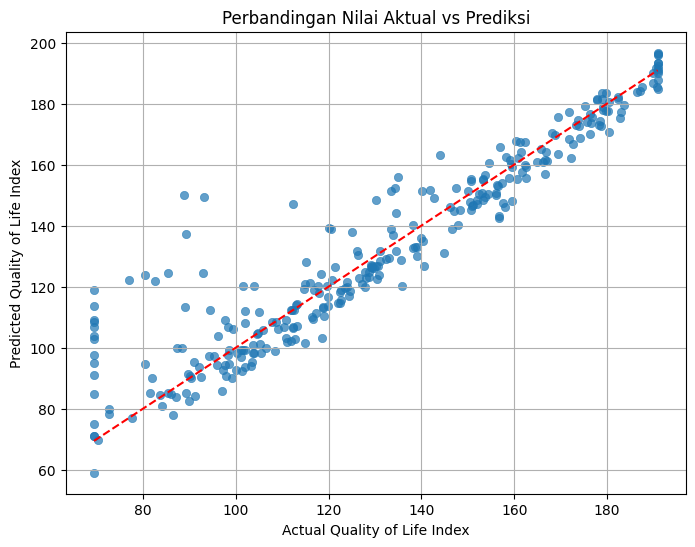

In [106]:
# Membuat scatter plot antara nilai aktual dan prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)

# Menambahkan garis referensi (garis identitas) untuk melihat kesesuaian prediksi dengan data aktual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Label dan judul
plt.xlabel("Actual Quality of Life Index")
plt.ylabel("Predicted Quality of Life Index")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.grid(True)

# Menampilkan plot
plt.show()

## 2.   **Random Forest Regressor**



**Random Forest Regressor sebelum mencoba tuning hyperparameter**

In [109]:
# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Evaluasi Model Random Forest Regressor:")
print(f"Mean Absolute Error (MAE)  : {mae_rf:.4f}")
print(f"Mean Squared Error (MSE)   : {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R²)             : {r2_rf:.4f}")

Evaluasi Model Random Forest Regressor:
Mean Absolute Error (MAE)  : 5.7362
Mean Squared Error (MSE)   : 126.1908
Root Mean Squared Error (RMSE): 11.2335
R-squared (R²)             : 0.8948


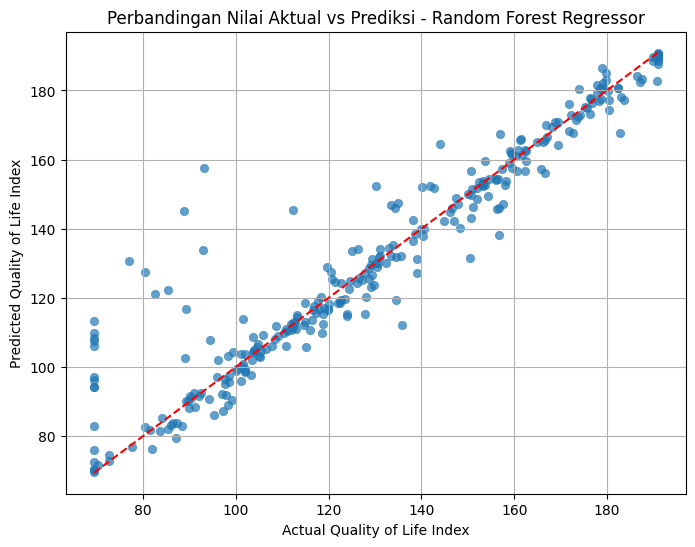

In [113]:
# Scatter plot untuk Random Forest Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, edgecolor=None)

# Menambahkan garis referensi (garis identitas)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Label dan judul
plt.xlabel("Actual Quality of Life Index")
plt.ylabel("Predicted Quality of Life Index")
plt.title("Perbandingan Nilai Aktual vs Prediksi - Random Forest Regressor")
plt.grid(True)

# Menampilkan plot
plt.show()

**Random Forest Regressor dengan mencoba tuning hyperparameter**

In [115]:
# Definisi model
rf = RandomForestRegressor(random_state=42)

# Definisi parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)
print("Best R² Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.9246554237483897


In [116]:
# Melatih model terbaik dengan data training
best_rf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_rf = best_rf.predict(X_test)

# Evaluasi model Random Forest Regressor setelah tuning
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest Regressor Setelah Tuning:")
print(f"Mean Absolute Error (MAE)  : {mae_rf:.4f}")
print(f"Mean Squared Error (MSE)   : {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R²)             : {r2_rf:.4f}")


Evaluasi Model Random Forest Regressor Setelah Tuning:
Mean Absolute Error (MAE)  : 5.7071
Mean Squared Error (MSE)   : 125.4877
Root Mean Squared Error (RMSE): 11.2021
R-squared (R²)             : 0.8954


## 3.   **Gradient Boosting Regressor**


**Gradient Boosting Regressor sebelum mencoba tuning hyperparameter**

In [110]:
# Inisialisasi model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model
gbr.fit(X_train, y_train)

# Melakukan prediksi
y_pred_gbr = gbr.predict(X_test)

# Evaluasi model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

# Menampilkan hasil evaluasi
print("Evaluasi Model Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE)  : {mae_gbr:.4f}")
print(f"Mean Squared Error (MSE)   : {mse_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"R-squared (R²)             : {r2_gbr:.4f}")

Evaluasi Model Gradient Boosting Regressor:
Mean Absolute Error (MAE)  : 6.5914
Mean Squared Error (MSE)   : 128.7917
Root Mean Squared Error (RMSE): 11.3486
R-squared (R²)             : 0.8926


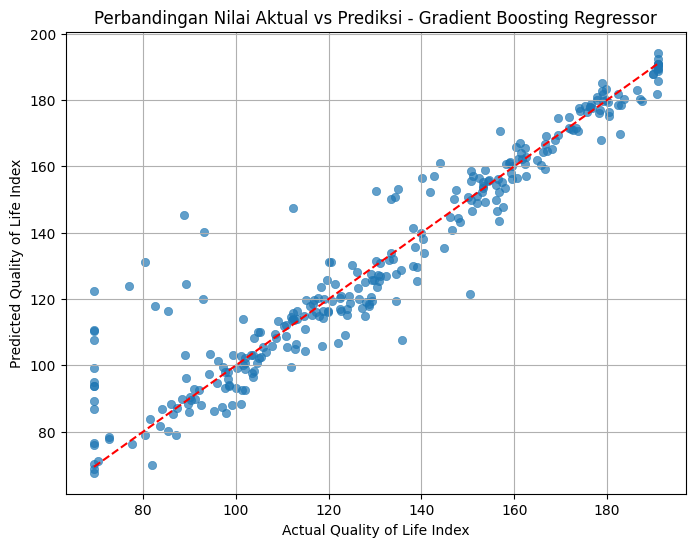

In [114]:
# Scatter plot untuk Gradient Boosting Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.7, edgecolor=None)

# Menambahkan garis referensi (garis identitas)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Label dan judul
plt.xlabel("Actual Quality of Life Index")
plt.ylabel("Predicted Quality of Life Index")
plt.title("Perbandingan Nilai Aktual vs Prediksi - Gradient Boosting Regressor")
plt.grid(True)

# Menampilkan plot
plt.show()

**Gradient Boosting Regressor dengan mencoba tuning hyperparameter**

In [118]:
# Definisi model
gbr = GradientBoostingRegressor(random_state=42)

# Definisi hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],       # Jumlah pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Kecepatan belajar
    'max_depth': [3, 5, 10],              # Kedalaman pohon
    'min_samples_split': [2, 5, 10],      # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]         # Minimum sampel per leaf
}

# GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mengambil model terbaik dari hasil tuning
best_gbr = grid_search.best_estimator_

# Menampilkan hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score dari Cross-Validation:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R² Score dari Cross-Validation: 0.9318395751119992


In [119]:
# Melakukan prediksi dengan model terbaik
y_pred_best = best_gbr.predict(X_test)

# Evaluasi model terbaik
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_best)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Gradient Boosting Regressor (Setelah Tuning):")
print(f"Mean Absolute Error (MAE)  : {mae:.4f}")
print(f"Mean Squared Error (MSE)   : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²)             : {r2:.4f}")


Evaluasi Model Gradient Boosting Regressor (Setelah Tuning):
Mean Absolute Error (MAE)  : 5.7298
Mean Squared Error (MSE)   : 110.0782
Root Mean Squared Error (RMSE): 10.4918
R-squared (R²)             : 0.9082


# Kesimpulan
Kesimpulan dari analisis ini menunjukkan bahwa dataset yang digunakan memiliki keterkaitan dengan berbagai faktor ekonomi, sosial, dan lingkungan yang mempengaruhi Quality of Life Index. Model yang diterapkan mampu memprediksi indeks kualitas hidup dengan tingkat akurasi yang cukup baik, di mana Gradient Boosting Regressor terbukti sebagai model dengan performa terbaik. Model ini memberikan nilai R² tertinggi dan error terendah, menjadikannya lebih unggul dibandingkan model lainnya. Random Forest Regressor juga menunjukkan hasil yang cukup baik, sementara Linear Regression merupakan model dengan nilai R² paling rendah. Selain itu, tuning hyperparameter menggunakan GridSearchCV berhasil meningkatkan performa model dengan menemukan kombinasi parameter optimal.
